# House Price Prediction 🏘️


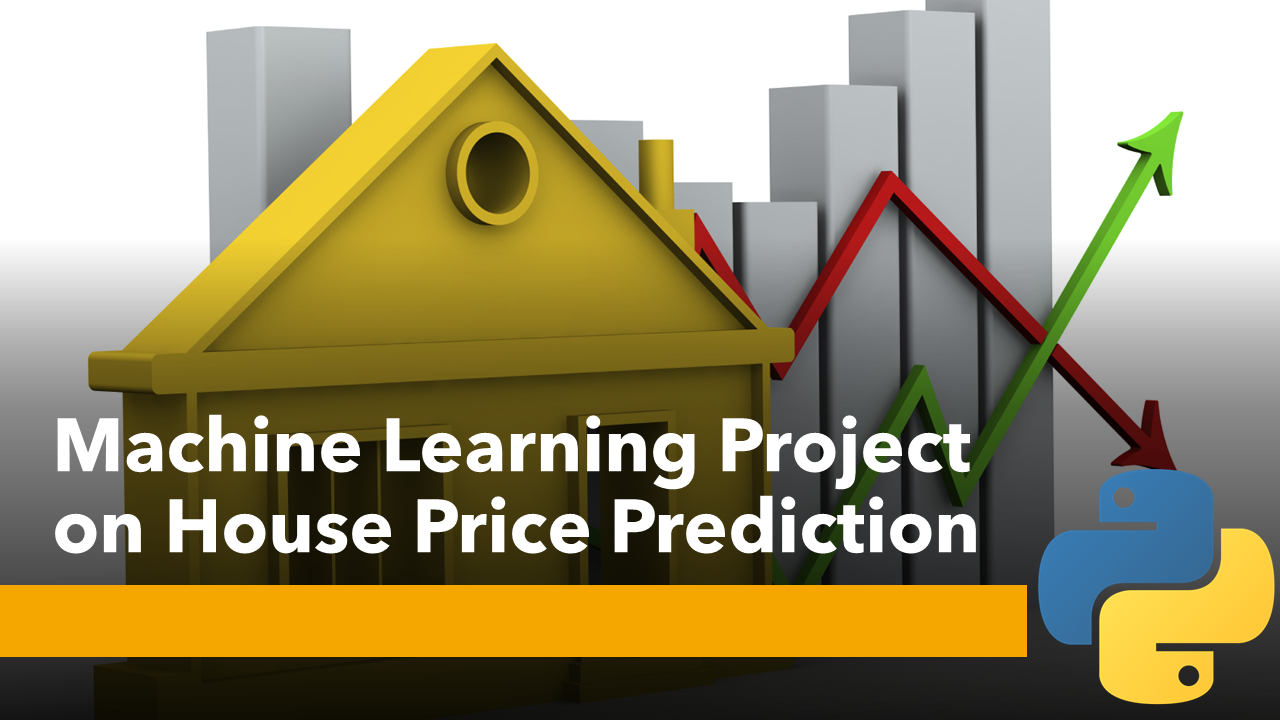

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

**Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/DATASETS/Housing.csv'

In [ ]:
df = pd.read_csv(path)

**Inspecting the data**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**EDA - Exploratory Data Analysis 🔍**

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

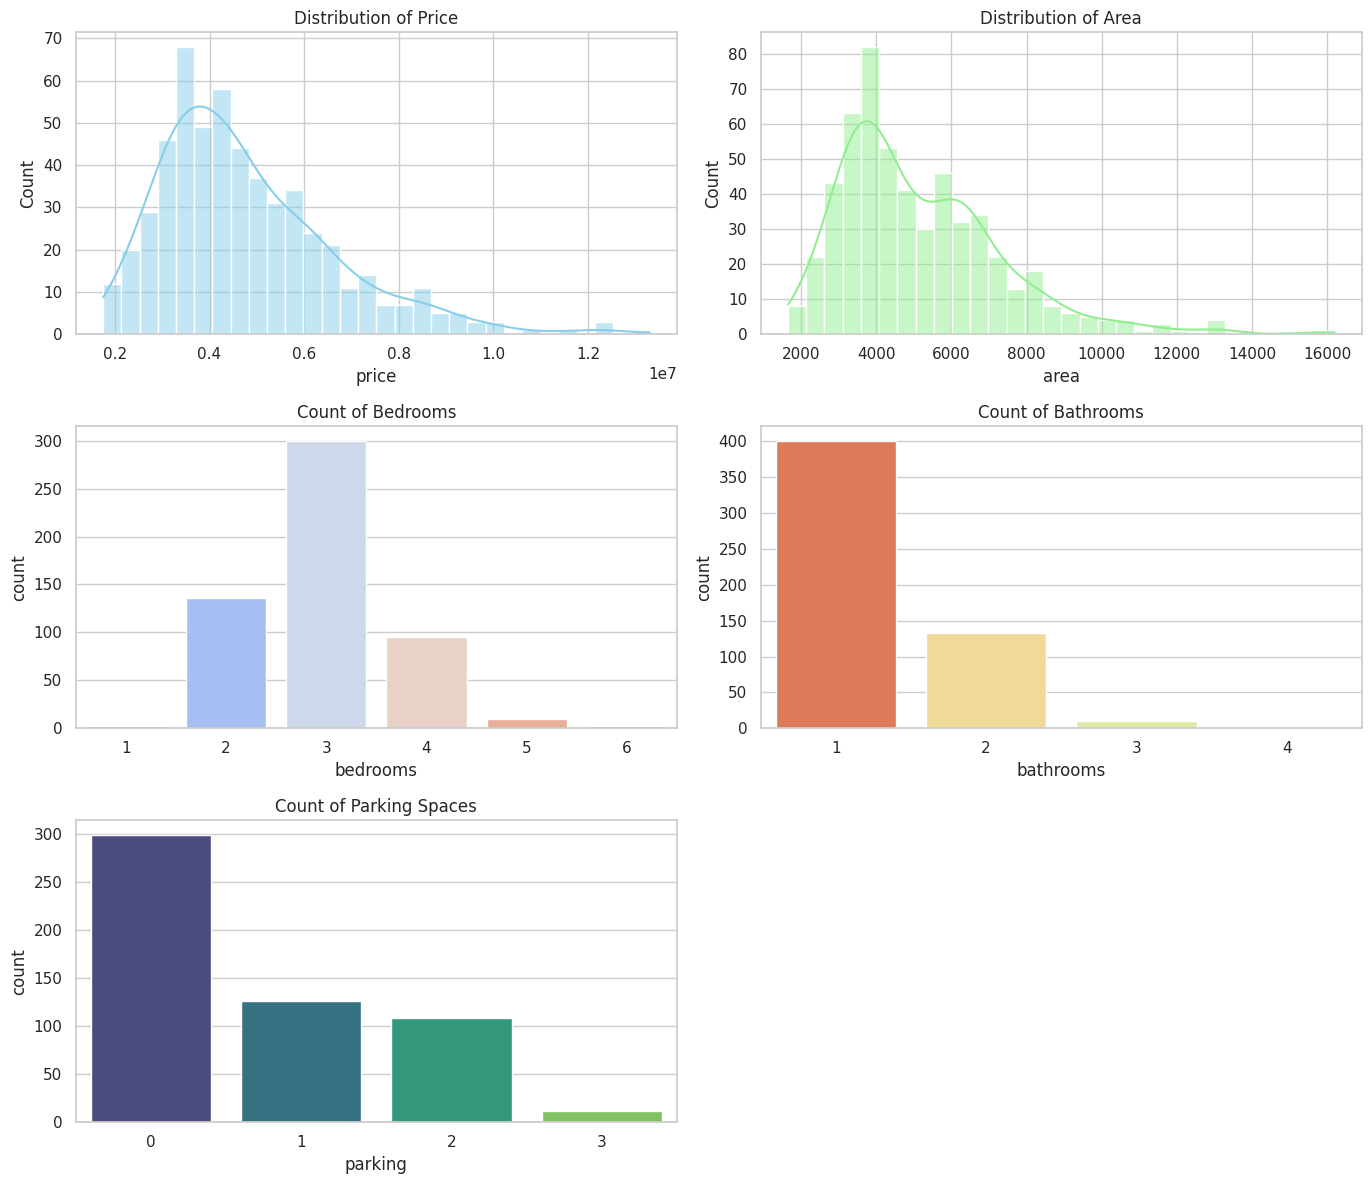

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to host the plots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Plot distributions of key numerical variables
sns.histplot(df['price'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Price')

sns.histplot(df['area'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Distribution of Area')

sns.countplot(x='bedrooms', data=df, ax=axs[1, 0], palette='coolwarm')
axs[1, 0].set_title('Count of Bedrooms')

sns.countplot(x='bathrooms', data=df, ax=axs[1, 1], palette='Spectral')
axs[1, 1].set_title('Count of Bathrooms')

sns.countplot(x='parking', data=df, ax=axs[2, 0], palette='viridis')
axs[2, 0].set_title('Count of Parking Spaces')

# Adjust layout
plt.tight_layout()

# Remove the empty subplot (if any)
fig.delaxes(axs[2,1])

plt.show()

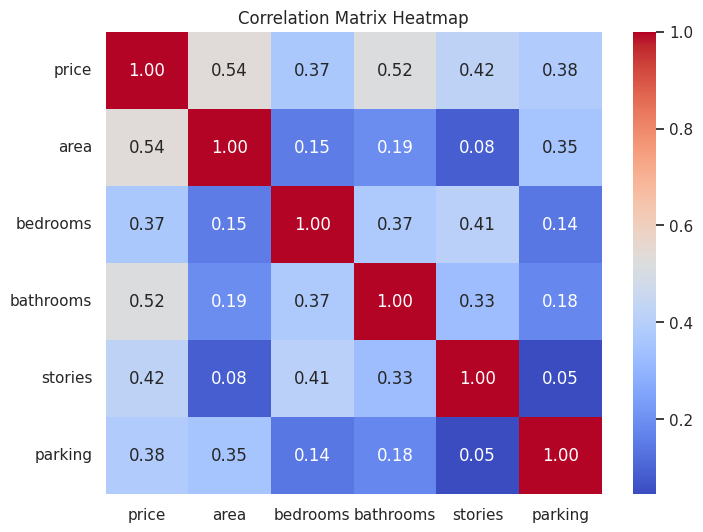

In [ ]:
# Heatmap of the correlation matrix focusing on relationships among variables
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

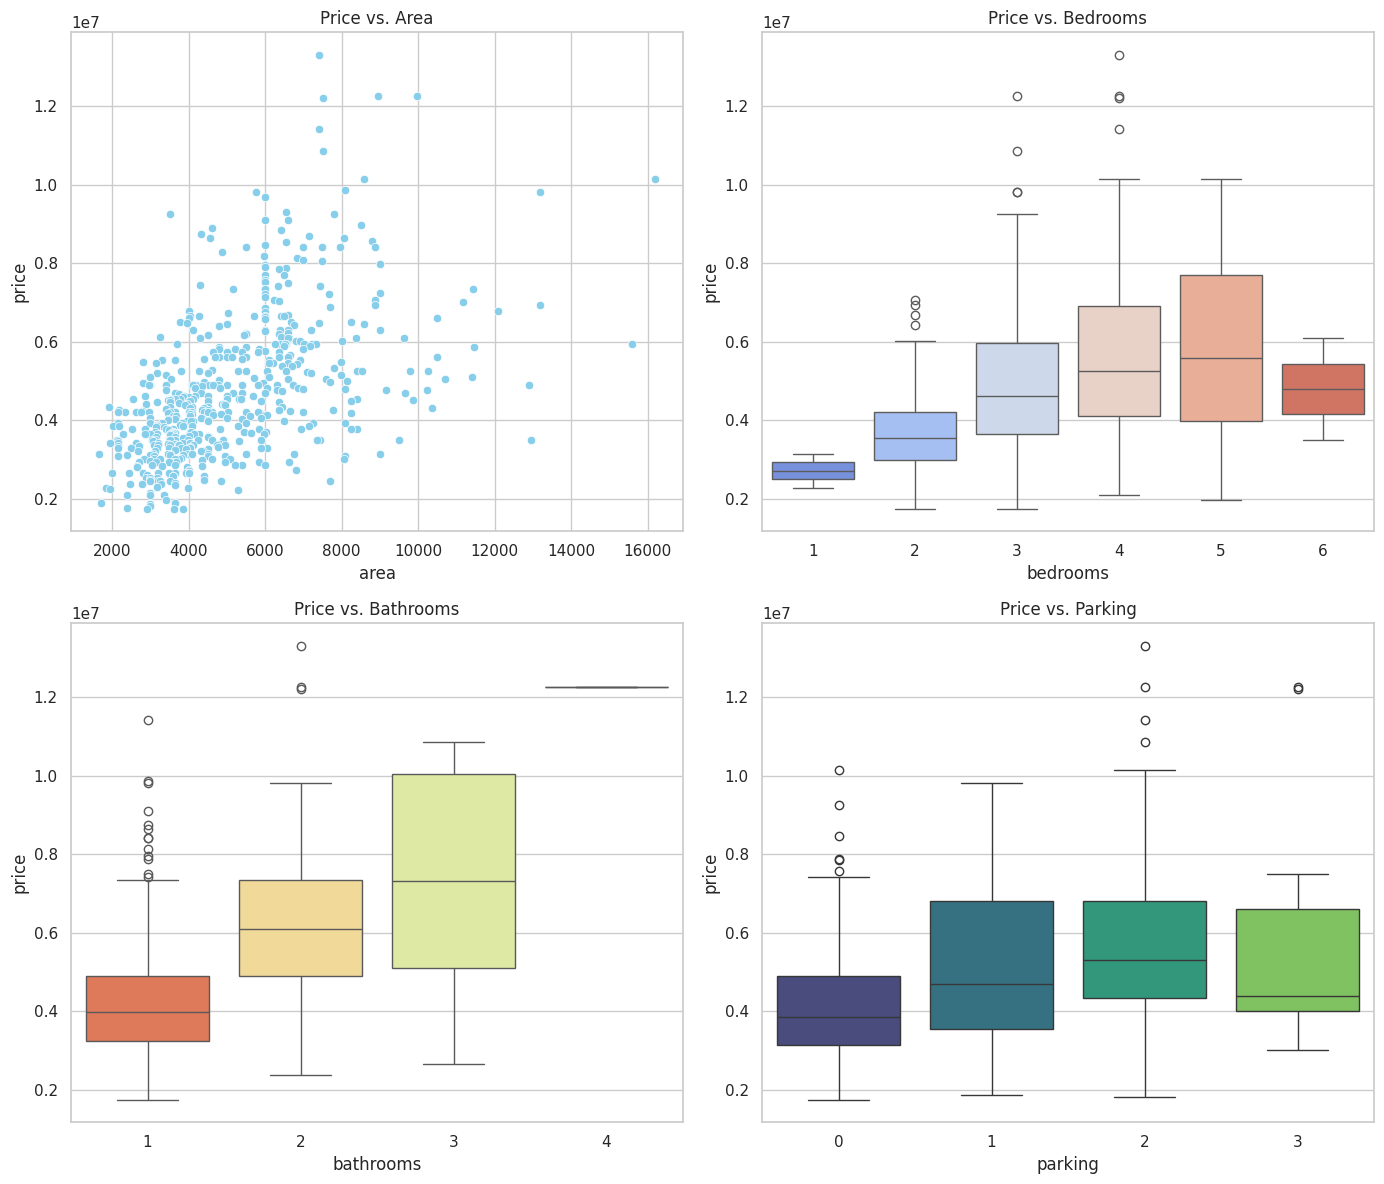

In [ ]:
# Create a figure to host the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot for Price vs. Area
sns.scatterplot(x='area', y='price', data=df, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Price vs. Area')

# Box plot for Price vs. Bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axs[0, 1], palette='coolwarm')
axs[0, 1].set_title('Price vs. Bedrooms')

# Box plot for Price vs. Bathrooms
sns.boxplot(x='bathrooms', y='price', data=df, ax=axs[1, 0], palette='Spectral')
axs[1, 0].set_title('Price vs. Bathrooms')

# Box plot for Price vs. Parking
sns.boxplot(x='parking', y='price', data=df, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Price vs. Parking')

# Adjust layout
plt.tight_layout()
plt.show()

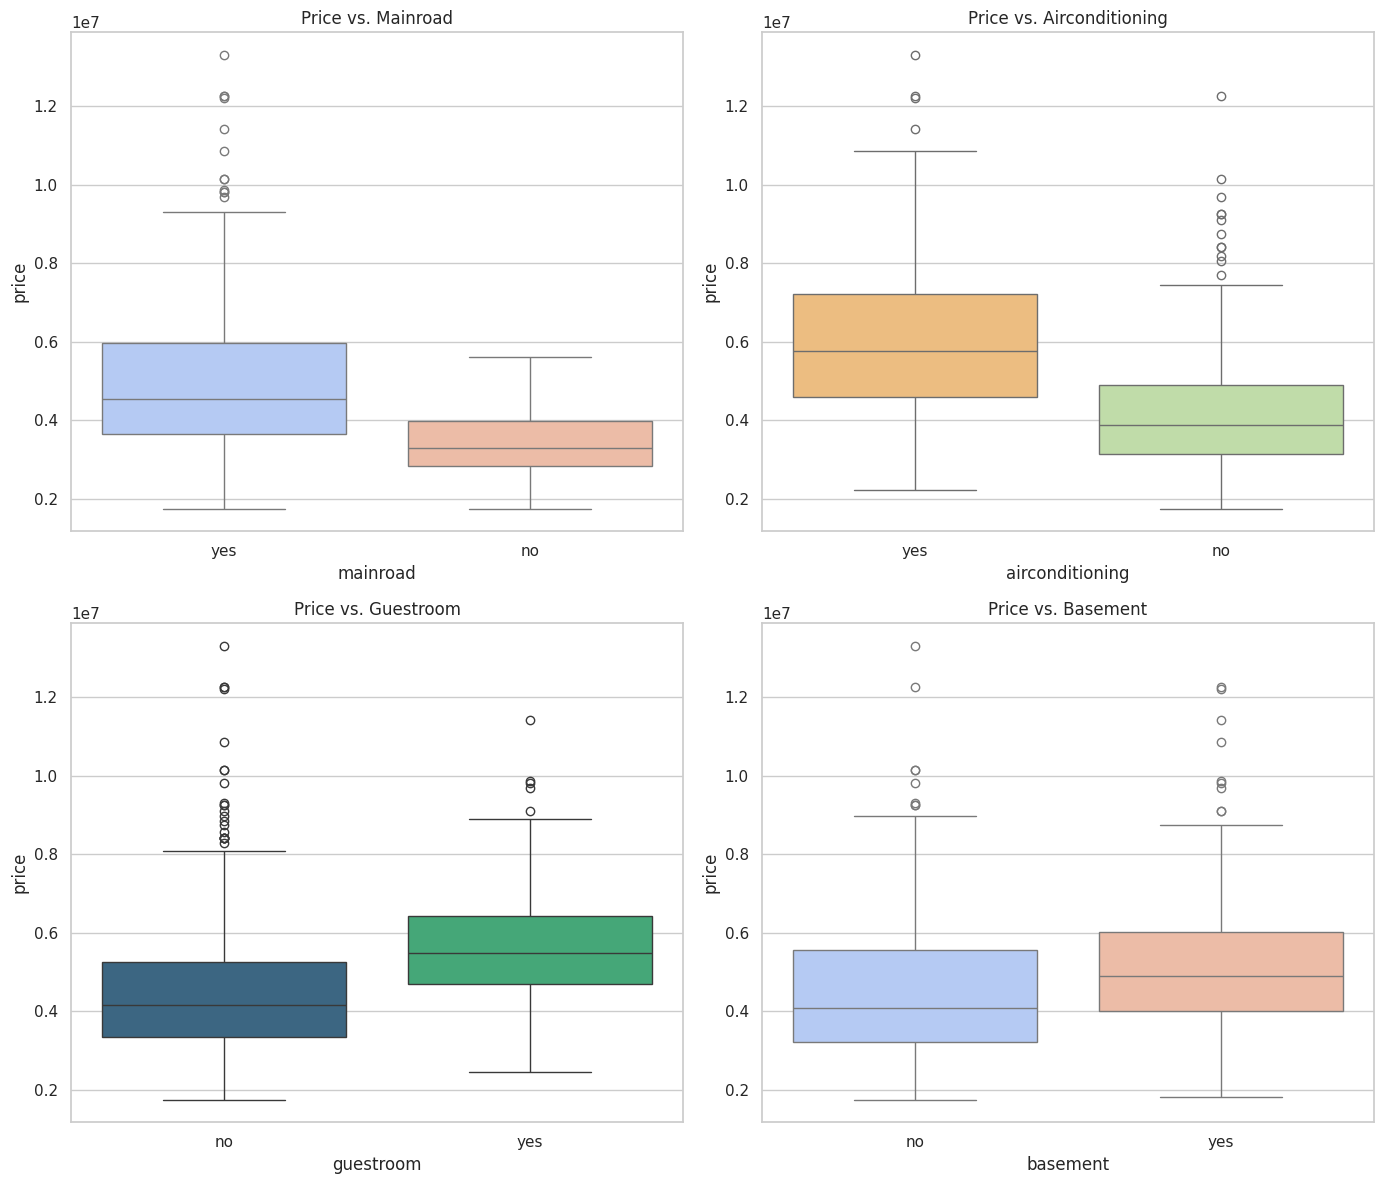

In [ ]:
# Create a figure to host the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for Price vs. Mainroad
sns.boxplot(x='mainroad', y='price', data=df, ax=axs[0, 0], palette='coolwarm')
axs[0, 0].set_title('Price vs. Mainroad')

# Box plot for Price vs. Airconditioning
sns.boxplot(x='airconditioning', y='price', data=df, ax=axs[0, 1], palette='Spectral')
axs[0, 1].set_title('Price vs. Airconditioning')

# Box plot for Price vs. Guestroom
sns.boxplot(x='guestroom', y='price', data=df, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Price vs. Guestroom')

# Box plot for Price vs. Basement
sns.boxplot(x='basement', y='price', data=df, ax=axs[1, 1], palette='coolwarm')
axs[1, 1].set_title('Price vs. Basement')

# Adjust layout
plt.tight_layout()
plt.show()


**Dealing with Categorical Variables (Using one hot encoding and dummy variables**

In [ ]:
# One-hot encoding for categorical variables with multiple categories
furnishing_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishing', drop_first=True)

# For binary categorical variables, convert yes/no to 1/0
binary_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_variables] = df[binary_variables].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Concatenate the original data (without the 'furnishingstatus' column) with the new dummy variables
data_encoded = pd.concat([df.drop('furnishingstatus', axis=1), furnishing_dummies], axis=1)

# Display the first few rows of the encoded dataframe to verify changes
data_encoded.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




**Standardization**

In [ ]:
# Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the splits to verify
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((436, 13), (109, 13), (436,), (109,))

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the model
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

rmse_linear, r2_linear


(1324506.9600914402, 0.6529242642153176)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the original (non-scaled) training data
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(1401496.8425384816, 0.6114024924156645)

**XGBoost**

In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgboost.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = xgboost.predict(X_test)

# Evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

rmse_xgb, r2_xgb

(1448930.01956903, 0.5846534721482441)

1) The Linear Regression model provided the best balance of performance and simplicity among the three models based on these metrics.

2) Random Forest and XGBoost might still outperform Linear Regression with proper tuning and more computational resources.

**Hyperparameter Tuning (Grid Search)**

**a) Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 20, 30, 40]
}
# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,  # 5-fold cross-validation
                              scoring='neg_mean_squared_error',  # Use MSE to compare models
                              verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

# Best parameters and score from GridSearchCV for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = (-grid_search_rf.best_score_)**0.5  # Convert MSE to RMSE

best_params_rf, best_score_rf


Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'max_depth': 10, 'n_estimators': 50}, 1101976.0936337544)

**Re-training the model with best parameters**

In [ ]:

# Re-train the model with the best hyperparameters on the entire training set
final_model_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'],
                                       max_depth=best_params_rf['max_depth'],
                                       random_state=42)
final_model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_test_rf = final_model_rf.predict(X_test)

# Evaluate the model
rmse_test_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Test RMSE: {rmse_test_rf}")
print(f"Test R² score: {r2_test_rf}")


Test RMSE: 1395313.8714519355
Test R² score: 0.6148236734332988


**b) XGBoost**

In [ ]:

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees. More trees can improve accuracy but increases computation time.
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting. Range is [0,1]
    'max_depth': [3, 6, 9],  # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child.
    'subsample': [0.7, 0.8, 0.9],  # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees.
}

# Initialize the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                               param_grid=param_grid_xgb,
                               cv=5,  # 5-fold cross-validation
                               scoring='neg_mean_squared_error',  # Use MSE to compare models
                               verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X_train, y_train)

# Best parameters and score from GridSearchCV for XGBoost
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = (-grid_search_xgb.best_score_)**0.5  # Convert MSE to RMSE

print("Best Parameters:", best_params_xgb)
print("Best RMSE:", best_score_xgb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7}
Best RMSE: 1065334.135262444


**Re-training the model with best parameters**

In [ ]:
# Retrain the model using the best hyperparameters
xgboost_optimized = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=3,
    n_estimators=100,
    subsample=0.7,
    objective='reg:squarederror',
    random_state=42
)

xgboost_optimized.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = xgboost_optimized.predict(X_test)

# Evaluate the optimized model
rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized RMSE: {rmse_optimized}")
print(f"Optimized R² score: {r2_optimized}")

Optimized RMSE: 1328048.8669759042
Optimized R² score: 0.6510655293897246
